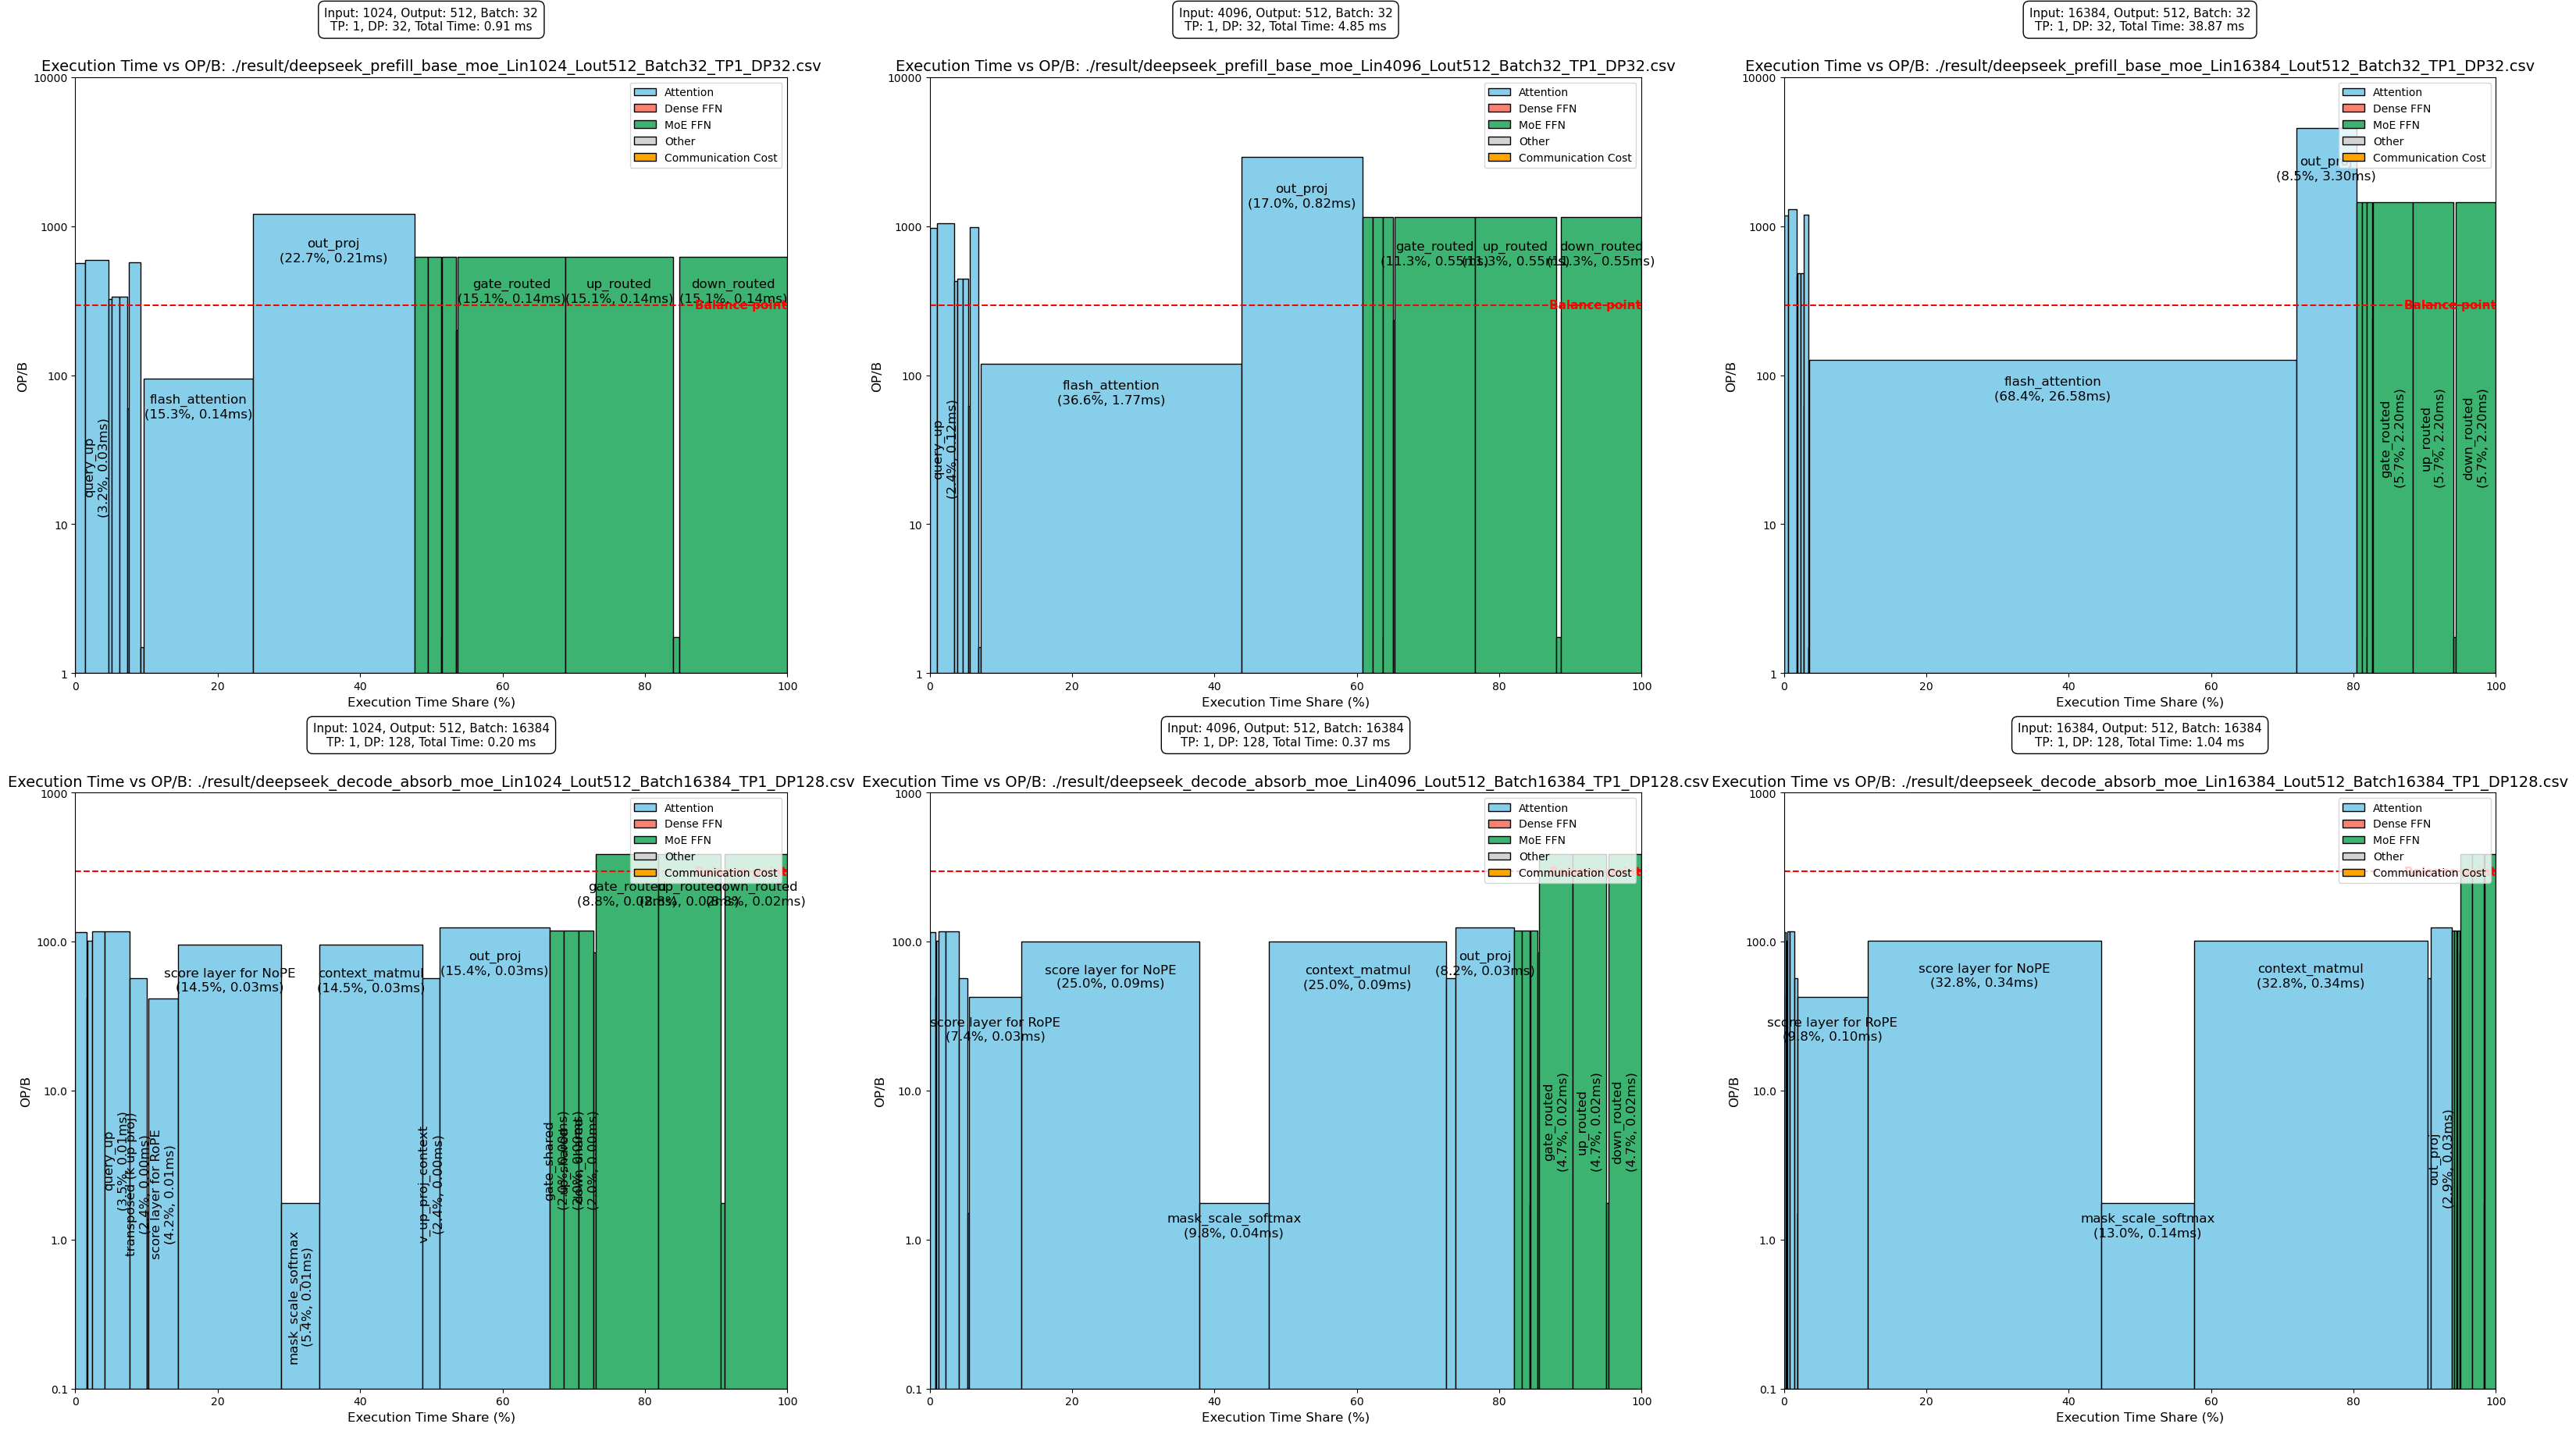

In [ ]:
from graph import create_multiple_time_graph
import pandas as pd
import matplotlib.pyplot as plt
                
input_len = 1024
output_len = 512
batch_size = 128
tp_degree = 4
dp_degree = 8

phase = "prefill" # or "decode"
impl = "absorb" # or "base"
moe_flag = True

configs = [ {"phase": "prefill", "impl": "base", "moe_flag": True, "input_len": 1024, "output_len":512,
             "batch_size": 32, "tp_degree": 1, "dp_degree": 32},
           {"phase": "prefill", "impl": "base", "moe_flag": True, "input_len": 4096, "output_len":512,
             "batch_size": 32, "tp_degree": 1, "dp_degree": 32},
           {"phase": "prefill", "impl": "base", "moe_flag": True, "input_len": 16384, "output_len":512,
             "batch_size": 32, "tp_degree": 1, "dp_degree": 32},
           {"phase": "decode", "impl": "absorb", "moe_flag": True, "input_len": 1024, "output_len":512,
             "batch_size": 16384, "tp_degree": 1, "dp_degree": 128},
           {"phase": "decode", "impl": "absorb", "moe_flag": True, "input_len": 4096, "output_len":512,
             "batch_size": 16384, "tp_degree": 1, "dp_degree": 128},
           {"phase": "decode", "impl": "absorb", "moe_flag": True, "input_len": 16384, "output_len":512,
             "batch_size": 16384, "tp_degree": 1, "dp_degree": 128}
           ]


x = 3
n_plots = len(configs)
y = n_plots // x

assert x*y == n_plots

fig, axes = plt.subplots(y, x, figsize=(20*y, 8*x), sharey = False)

for idx, config in enumerate(configs):
    input_len = config["input_len"]
    output_len = config["output_len"]
    batch_size = config["batch_size"]
    tp_degree = config["tp_degree"]
    dp_degree = config["dp_degree"]
    %run main.py --input-len $input_len --output-len $output_len --batch-size $batch_size --data-size 1 --model-num 0 --tensor-degree $tp_degree --data-degree $dp_degree --flash-attention

for idx, config in enumerate(configs):
    csv_name = "./result/deepseek_{}_{}_{}_Lin{}_Lout{}_Batch{}_TP{}_DP{}.csv".format(config["phase"], config["impl"], "moe" if config["moe_flag"] else "dense", config["input_len"], config["output_len"], config["batch_size"], config["tp_degree"], config["dp_degree"])
    
    data_csv = pd.read_csv(csv_name)
    create_multiple_time_graph(data_csv, csv_name, axes[idx//x, idx%x],
                      config["input_len"],
                      config["output_len"],
                      config["batch_size"],
                      config["tp_degree"],
                      config["dp_degree"])
    
plt.show()